In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
#Analyse faite sur une seule page
csv_path_pretraité = 'pipelines/textract_full_preprocessing/csv_tables/mortstatsh_1921-255.csv'
csv_path_sans_pretraitement = 'pipelines/textract_skew_only/csv_tables/mortstatsh_1921-255.csv'
excell_tesseract_finetuned = "pipelines/tesseract_ocr/csv_tables/moststatsh_1921-255_finetuned.xlsx"
excell_tesseract_nofintute = "pipelines/tesseract_ocr/csv_tables/moststatsh_1921-255_nofinetune.xlsx"

# Analyse sur 30 pages 
# csv_path_pretraité = "pipelines/textract_full_preprocessing/csv_tables/csv_30_pages.csv"
# csv_path_sans_pretraitement = "pipelines/textract_skew_only/csv_tables/csv_30_pages.csv"

In [3]:
df_tesseract_finetuned = pd.read_excel(excell_tesseract_finetuned, header=None)
df_tesseract_nofinetune = pd.read_excel(excell_tesseract_nofintute, header=None)
df_pre = pd.read_csv(csv_path_pretraité, sep='|', header=None, on_bad_lines='warn')
df_sans = pd.read_csv(csv_path_sans_pretraitement, sep='|', header=None, on_bad_lines='warn')


In [4]:
def contient_chiffre_et_lettre(texte):
    texte = str(texte)
    pattern = r'([A-Za-z]+\s*\d+|\d+\s*[A-Za-z]+|[A-Za-z]+\d+[A-Za-z]+)'
    return len(re.findall(pattern, texte))

def contient_plusieurs_chiffres(texte):
    texte = str(texte)
    chiffres = re.findall(r'\b\d{1,3}(?:[.,]\d{3})*\b', texte)
    return len(chiffres) >= 2

def analyse_dataframe(df):
    lignes = df.shape[0]
    colonnes = df.shape[1]

    labels = df[0].dropna().apply(lambda x: isinstance(x, str)).sum()

    chiffres_purs = df.map(lambda x: len(re.findall(r'\b\d+\b', str(x)))).sum().sum()

    chiffres_melanges = df.map(contient_chiffre_et_lettre).sum().sum()

    # chiffres_concaténés = df.map(contient_plusieurs_chiffres)
    # nb_chiffres_concaténés = chiffres_concaténés.sum().sum()

    return {
        'lignes': lignes,
        'colonnes': colonnes,
        'labels': labels,
        'chiffres_purs': chiffres_purs,
        'chiffres_melanges': chiffres_melanges
        # 'chiffres_concaténés': nb_chiffres_concaténés
    }



In [5]:
def analyse_excel(df):
    compteur_chiffres = 0
    
    # Parcourir chaque cellule du DataFrame
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            # Extraire le contenu de la cellule, convertir en chaîne de caractères
            cellule = str(df.iloc[i, j])
            
            # Trouver tous les chiffres dans la cellule
            chiffres = re.findall(r'\d+', cellule)
            
            # Ajouter le nombre de chiffres trouvés à notre compteur
            compteur_chiffres += len(chiffres)
    
    return compteur_chiffres

In [6]:
# Analyse
stats_pre = analyse_dataframe(df_pre)
stats_sans = analyse_dataframe(df_sans)
# stats_excel_finetuned = analyse_excel(excell_tesseract_finetuned)
# stats_excel_nofintue = analyse_excel(excell_tesseract_nofintute)

# Catégories (labels des plots)
categories = ['lignes', 'colonnes', 'labels', 'chiffres_purs', 'chiffres_melanges'] #, 'chiffres_concaténés'
valeurs_pre = [stats_pre[c] for c in categories]
valeurs_sans = [stats_sans[c] for c in categories]
stats_pre[categories[3]] -= stats_pre[categories[4]]


Nombre de lignes avec prétraitement : 78
Nombre de lignes sans prétraitement : 82
Différence de lignes : 4


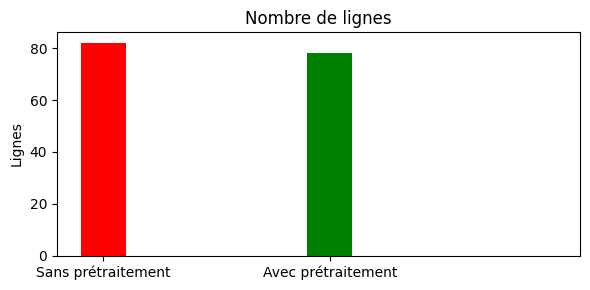

In [7]:
plt.figure(figsize=(6, 3))
cat = categories[0]
print(f"Nombre de lignes avec prétraitement : {stats_pre[cat]}")
print(f"Nombre de lignes sans prétraitement : {stats_sans[cat]}")
print(f"Différence de lignes : {abs(stats_pre[cat] - stats_sans[cat])}")
plt.plot(2, 2)
plt.bar(['Sans prétraitement', 'Avec prétraitement'], [stats_sans[cat], stats_pre[cat]], color=['red', 'green'], width=0.2)
plt.title(f'Nombre de {cat}')
plt.ylabel(cat.capitalize())

plt.tight_layout()
plt.show()

Nombre de colonnes avec prétraitement : 14
Nombre de colonnes sans prétraitement : 14
Différence de colonnes : 0


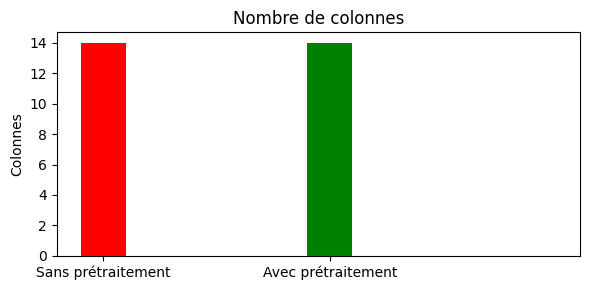

In [8]:
plt.figure(figsize=(6, 3))
cat = categories[1]
print(f"Nombre de colonnes avec prétraitement : {stats_pre[cat]}")
print(f"Nombre de colonnes sans prétraitement : {stats_sans[cat]}")
print(f"Différence de colonnes : {abs(stats_pre[cat] - stats_sans[cat])}")
plt.plot(2, 2)
plt.bar(['Sans prétraitement', 'Avec prétraitement'], [stats_sans[cat], stats_pre[cat]], color=['red', 'green'], width=0.2)
plt.title(f'Nombre de {cat}')
plt.ylabel(cat.capitalize())

plt.tight_layout()
plt.show()

Nombre de labels avec prétraitement : 76
Nombre de labels sans prétraitement : 80
Différence de labels : 4


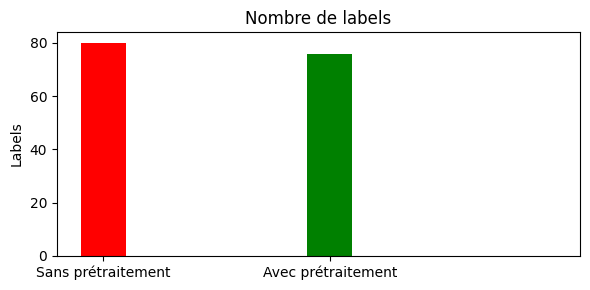

In [9]:
plt.figure(figsize=(6, 3))
cat = categories[2]
print(f"Nombre de labels avec prétraitement : {stats_pre[cat]}")
print(f"Nombre de labels sans prétraitement : {stats_sans[cat]}")
print(f"Différence de labels : {abs(stats_pre[cat] - stats_sans[cat])}")
plt.plot(2, 2)
plt.bar(['Sans prétraitement', 'Avec prétraitement'], [stats_sans[cat], stats_pre[cat]], color=['red', 'green'], width=0.2)
plt.title(f'Nombre de {cat}')
plt.ylabel(cat.capitalize())

plt.tight_layout()
plt.show()

Nombre de chiffres pures avec prétraitement : 968
Nombre de chiffres pures sans prétraitement : 998
Différence de chiffres pures : 30


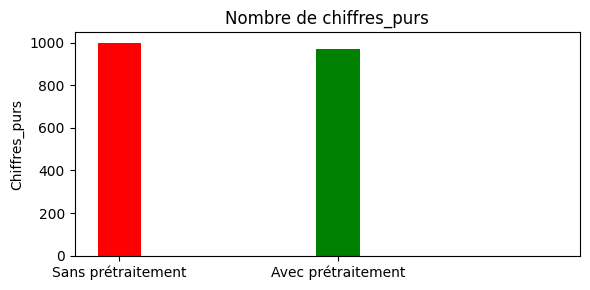

In [10]:
plt.figure(figsize=(6, 3))
cat = categories[3]
print(f"Nombre de chiffres pures avec prétraitement : {stats_pre[cat]}")
print(f"Nombre de chiffres pures sans prétraitement : {stats_sans[cat]}")
print(f"Différence de chiffres pures : {abs(stats_pre[cat] - stats_sans[cat])}")
plt.plot(2, 2)
plt.bar(['Sans prétraitement', 'Avec prétraitement'], [stats_sans[cat], stats_pre[cat]], color=['red', 'green'], width=0.2)
plt.title(f'Nombre de {cat}')
plt.ylabel(cat.capitalize())

plt.tight_layout()
plt.show()

Nombre de chiffres melanges avec prétraitement : 30
Nombre de chiffres melanges sans prétraitement : 0
Différence de chiffres melanges : 30


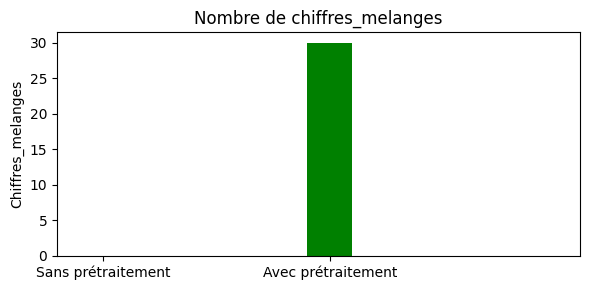

In [11]:
plt.figure(figsize=(6, 3))
cat = categories[4]
print(f"Nombre de chiffres melanges avec prétraitement : {stats_pre[cat]}")
print(f"Nombre de chiffres melanges sans prétraitement : {stats_sans[cat]}")
print(f"Différence de chiffres melanges : {abs(stats_pre[cat] - stats_sans[cat])}")
plt.plot(2, 2)
plt.bar(['Sans prétraitement', 'Avec prétraitement'], [stats_sans[cat], stats_pre[cat]], color=['red', 'green'], width=0.2)
plt.title(f'Nombre de {cat}')
plt.ylabel(cat.capitalize())

plt.tight_layout()
plt.show()

In [12]:
# Analyse pas encore aboutie : detecter les chiffres multiples à l'intérieur d'une seule colonne, ex : 15 70|1 15|5 65| etc.

# plt.figure(figsize=(6, 3))
# cat = categories[4]
# print(f"Nombre de chiffres concatenes avec prétraitement : {stats_pre[cat]}")
# print(f"Nombre de chiffres concatenes sans prétraitement : {stats_sans[cat]}")
# print(f"Différence de chiffres concatenes : {abs(stats_pre[cat] - stats_sans[cat])}")
# plt.plot(2, 2)
# plt.bar(['Sans prétraitement', 'Avec prétraitement'], [stats_sans[cat], stats_pre[cat]], color=['red', 'green'], width=0.2)
# plt.title(f'Nombre de {cat}')
# plt.ylabel(cat.capitalize())

# plt.tight_layout()
# plt.show()

In [16]:
nombre_différences = 0

for i in range(min(df_sans.shape[0], df_tesseract_nofinetune.shape[0])):
    for j in range(min(df_sans.shape[1], df_tesseract_nofinetune.shape[1])):

        # Extraire les valeurs des cellules (on les convertit en chaîne de caractères)
        tesseract_val = str(df_tesseract_nofinetune.iloc[i, j])
        textract_val = str(df_sans.iloc[i, j])

        # Vérifier si ce sont des chiffres et les comparer
        if tesseract_val.isdigit() and textract_val.isdigit():
            if tesseract_val != textract_val:
                nombre_différences += 1

# Calculer le score de fiabilité
total_chiffres_comparés = stats_sans[categories[3]]
fiabilité = 1 - nombre_différences / total_chiffres_comparés

# Afficher le score de fiabilité
print(f"Score de fiabilité de Tesseract sans finetune: {fiabilité * 100:.2f}%")
print("Résultat bien évidement éronné (cases vides et fausses), reste à déterminer pourquoi")

Score de fiabilité de Tesseract sans finetune: 100.00%
Résultat bien évidement éronné (cases vides et fausses), reste à déterminer pourquoi


In [14]:
nombre_différences = 0
# différences = []

for i in range(min(df_sans.shape[0], df_tesseract_nofinetune.shape[0])):
    for j in range(min(df_sans.shape[1], df_tesseract_nofinetune.shape[1])):
        # Extraire les valeurs des cellules (on les convertit en chaîne de caractères)
        tesseract_val = str(df_tesseract_finetuned.iloc[i, j])
        textract_val = str(df_sans.iloc[i, j])

        # Vérifier si ce sont des chiffres et les comparer
        if tesseract_val.isdigit() and textract_val.isdigit():
            if tesseract_val != textract_val:
                nombre_différences += 1
                # différences.append((i, j, textract_val, tesseract_val))  # Ajouter les indices et les valeurs différentes

# Calculer le score de fiabilité
total_chiffres_comparés = stats_sans[categories[3]]
fiabilité = 1 - nombre_différences / total_chiffres_comparés

# Afficher le score de fiabilité
print(f"Score de fiabilité de Tesseract avec finetune: {fiabilité * 100:.2f}%")

Score de fiabilité de Tesseract avec finetune: 54.51%
